In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

from cut_predictor import DoubleProjectionPredictor

In [2]:
doe_single = pd.read_csv('../data/doe.csv')
doe_single

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.00,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
1,2,5,1.48,400,2.4,3,-4,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
2,3,1,1.00,210,2.4,3,-1,70,70.2,1.71,2.00,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
3,4,2,1.19,390,2.4,3,5,30,70.2,1.71,2.00,200.03813,DC01_1.20mm,160.714935,174.535075,564.455438,424.931018,490.442223
4,5,1,1.00,360,1.6,2,3,30,71.8,1.14,1.33,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,1.01,90,1.6,2,0,70,71.8,1.14,1.33,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
996,997,4,0.99,480,2.4,3,5,30,70.2,1.71,2.00,71.94184,AA5083_1.00mm,248.796491,251.315902,385.373316,371.774337,384.299873
997,998,5,1.48,490,2.4,3,3,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
998,999,5,1.48,120,2.4,3,-3,30,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834


In [3]:
doe_joining = pd.read_csv('../data/doe_joining.csv')
doe_joining

,doe_id,Oberblech_ID,Unterblech_ID,Spanner_1,Spanner_2,Spanner_3,Spanner_4,Oberblech_MID,Unterblech_MID,Success,Oberblech_zt,Unterblech_zt,Oberblech_t,Unterblech_t
0,1,2,1,-3,-5,-5,3,5,3,1,50,30,1.48,1.01
1,2,6,4,-3,2,2,-2,4,2,1,50,30,0.99,1.19
2,3,12,5,-3,2,-4,1,1,1,1,50,30,1.00,1.00
3,4,13,7,3,3,4,5,3,4,1,50,30,1.01,0.99
4,5,19,9,5,-5,1,-3,3,6,1,50,30,1.01,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,981,990,-3,-4,2,-1,5,6,1,70,30,1.48,1.01
496,497,986,993,2,5,-2,-3,4,5,0,70,30,0.99,1.48
497,498,992,994,-1,-1,-4,4,6,5,0,70,30,1.01,1.48
498,499,996,997,3,0,-1,-3,3,4,0,70,30,1.01,0.99


In [4]:
data = pd.read_csv('../data/joining.csv')
data

,doe_id,u,v,pos,x,y,z,thickness,epseqpl,thinning
0,1,0.000000,0.000000,1,-124.976913,-119.789223,-10.933162,1.500506,0.000000,1.013855
1,1,1.000000,0.008265,1,128.847961,-110.392357,-19.564697,1.500526,0.000000,1.013869
2,1,0.500000,0.501202,1,-0.117754,1.766519,33.259033,1.497741,0.000605,1.011987
3,1,0.500000,0.541457,1,-0.176490,17.830286,32.576855,1.495413,0.001760,1.010414
4,1,1.000000,0.270177,1,151.037659,-60.162697,6.698619,1.422338,0.336137,0.961039
...,...,...,...,...,...,...,...,...,...,...
14754118,487,0.248585,0.563621,0,-87.781647,18.459038,-46.403336,1.490891,0.020119,1.007359
14754119,487,0.237705,0.577821,0,-92.530228,23.965593,-45.939186,1.478159,0.083724,0.998756
14754120,487,0.247812,0.543246,0,-87.685509,11.618693,-47.742691,1.403345,0.077909,0.948206
14754121,487,0.244286,0.573259,0,-89.899788,22.363468,-46.155094,1.487671,0.023589,1.005183


In [5]:
reg = DoubleProjectionPredictor()

reg.load_data(
    doe_joining=doe_joining, 
    doe_single=doe_single, 
    data=data, 
    process_parameters_joining = [
        'Spanner_1',
        'Spanner_2',
        'Spanner_3',
        'Spanner_4',
        'Oberblech_MID',
        'Unterblech_MID',
    ], 
    process_parameters_single = [
        'Blechdicke', 
        'Niederhalterkraft', 
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe',
        'Rp0',
    ], 
    position = ['u', 'v'], 
    output = ['x', 'y', 'z'], 
    categorical_joining=[
    ], 
    categorical_single= [
        'Ziehspalt', 
        'Ziehtiefe',
    ], 
    index_joining='doe_id', 
    index_single='doe_id', 
    part_index='pos', 
    top_bottom=['Oberblech_ID', 'Unterblech_ID'],
    validation_split=0.1, 
    validation_method="random"

)
reg.save_config("../models/joining_xyz.pkl")
reg.data_summary()

Ziehspalt
Ziehspalt_1.6_top
Ziehspalt_2.4_top
     Ziehspalt_1.6_top  Ziehspalt_2.4_top
0                    0                  1
1                    1                  0
2                    0                  1
3                    1                  0
4                    1                  0
..                 ...                ...
495                  0                  1
496                  0                  1
497                  1                  0
498                  1                  0
499                  0                  1

[500 rows x 2 columns]
Ziehtiefe
Ziehtiefe_30_top
Ziehtiefe_50_top
Ziehtiefe_70_top
     Ziehtiefe_30_top  Ziehtiefe_50_top  Ziehtiefe_70_top
0                   0                 1                 0
1                   0                 1                 0
2                   0                 1                 0
3                   0                 1                 0
4                   0                 1                 0
..               

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6912      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 256)               0         
                                         

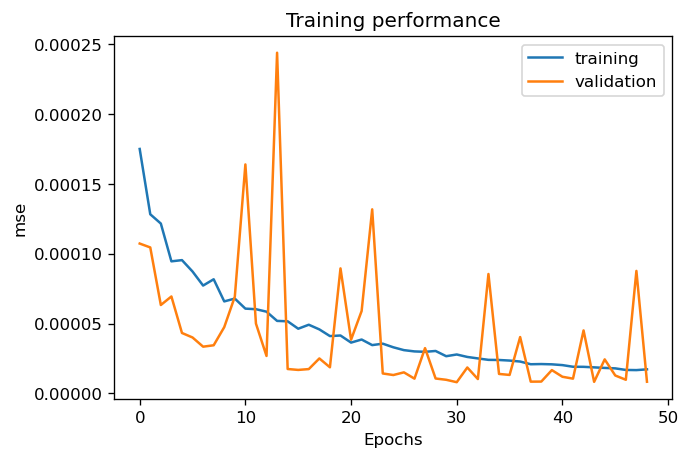

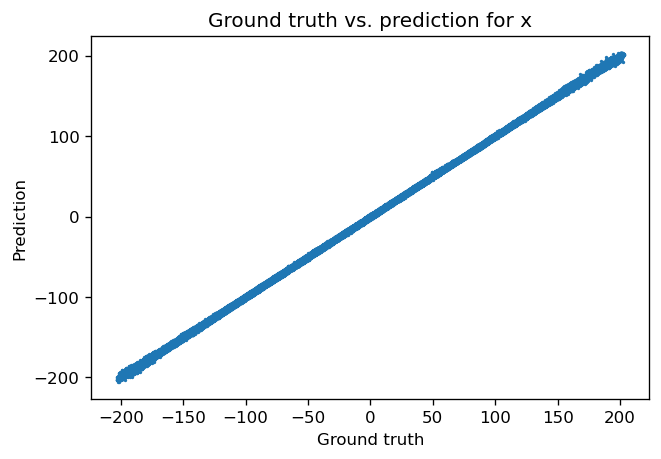

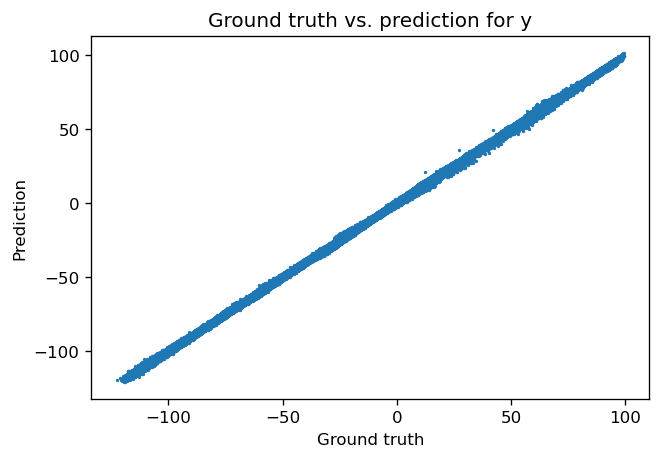

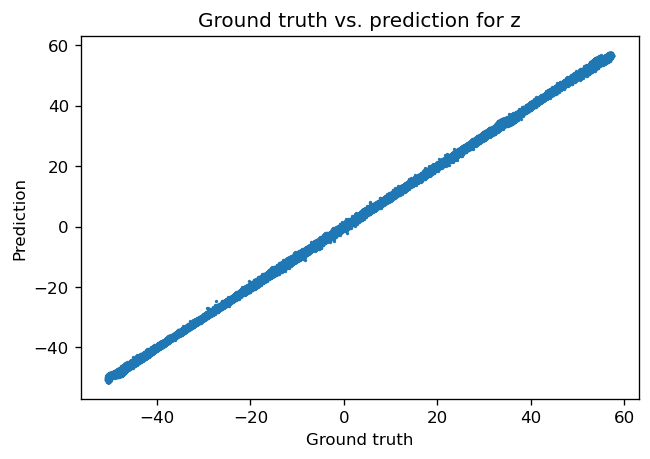

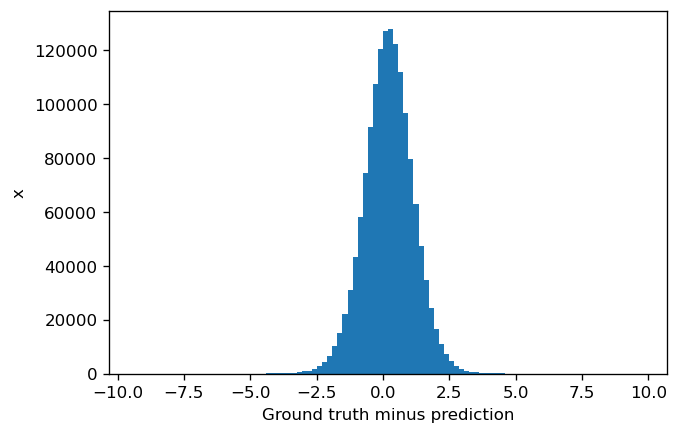

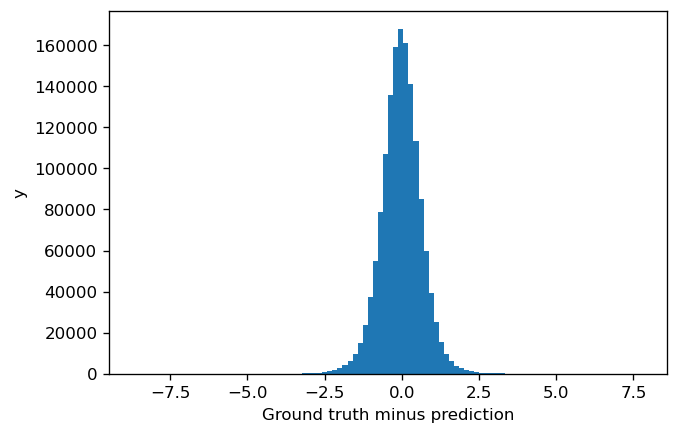

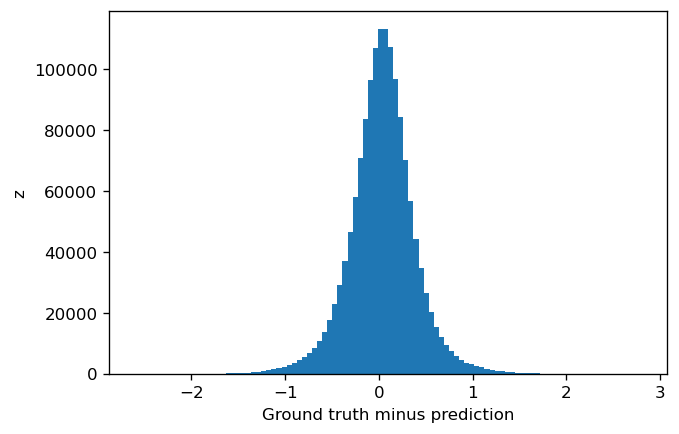

In [6]:
config = {
    'batch_size': 2048*16,
    'max_epochs': 50,
    'layers': [256, 256, 256, 256, 256],
    'dropout': 0.0,
    'learning_rate': 0.001,
    'activation': 'lrelu'
}

reg.custom_model(save_path='../models/best_joining_model', config=config, verbose=True)
reg.training_summary()

In [6]:
reg.load_network('../models/best_joining_model')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



Doe_ID 189


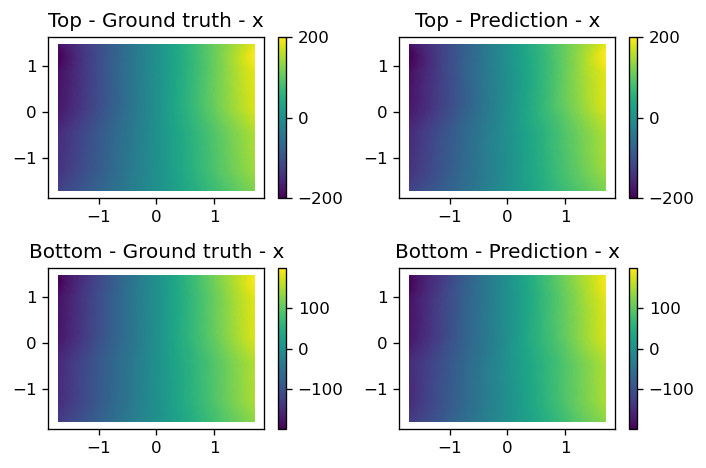

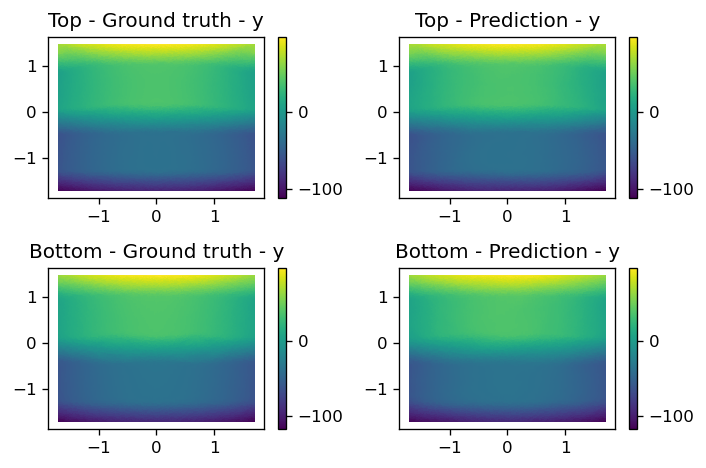

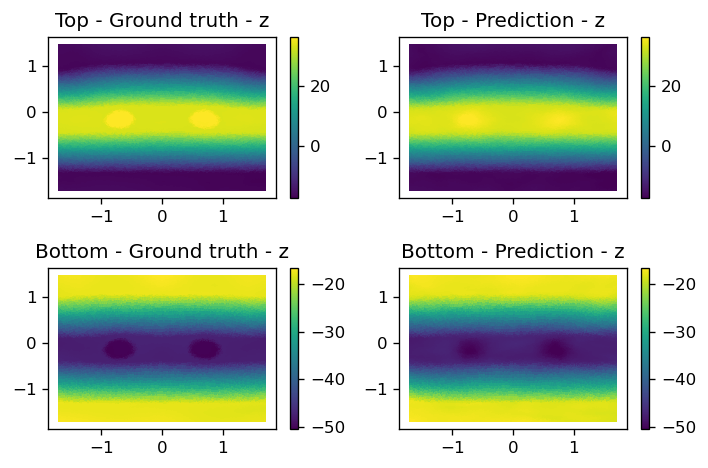

In [7]:
idx = np.random.choice(data['doe_id'].unique()) 
print("Doe_ID", idx)
reg.compare(idx)

Doe_ID 214


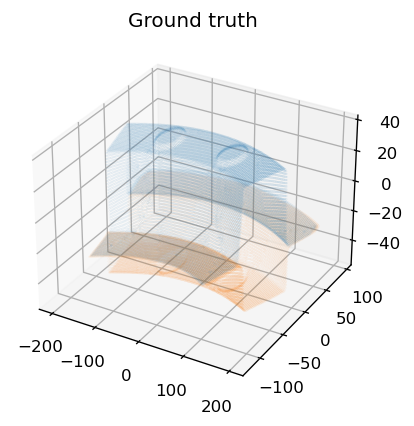

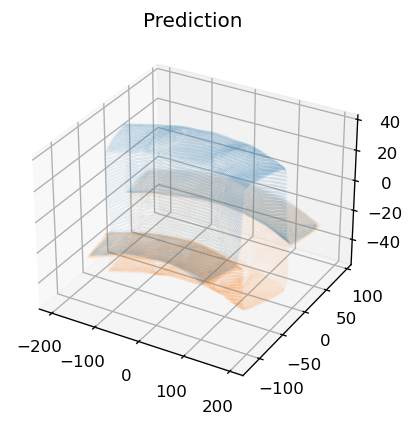

In [24]:
idx = np.random.choice(data['doe_id'].unique()) 
print("Doe_ID", idx)
reg.compare_xyz(idx)